-----------------------------------------------------------------------------------------------------------------------
# **Colombia Crude Oil Production Forecasting**
-----------------------------------------------------------------------------------------------------------------------

----------------
## **Context** 
----------------

Hydrocarbons, specifically oil, play a crucial role in providing energy for transportation and various industries, making it a cornerstone of the world economy. The production of crude oil is considered a key indicator of global economic health, but the finite nature of oil and our reliance on it creates complex challenges, including predicting future production patterns.

Forecasting crude oil production is a crucial element in decision-making and investment planning for oil-producing nations. Governments and businesses invest significant resources in determining production forecasts to identify opportunities and determine the best path forward.

------------------
## **Objective**
------------------

This case study involves the analysis of historical oil production data for a specific country spanning from 1992 to 2018. The objective is to develop a time series forecasting model utilizing various models such as AR, MA, ARMA, and ARIMA to accurately predict the country's future oil production. 

--------------------------
## **Data Dictionary**
--------------------------

The dataset that we will be using is 'Crude Oil Production by Country'. This dataset contains the yearly oil production of 222 countries, but for simplicity, we will use only one country to forecast its future oil production.

## **Importing necessary libraries**

In [1]:
# Version check 
import statsmodels

statsmodels.__version__

'0.13.5'

In [2]:

import numpy as np #  data manipulation
import pandas as pd #  data manipulation
import matplotlib.pyplot as plt # data visualization
import statsmodels.api as sm # time series decomposition
from statsmodels.graphics import tsaplots # create ACF and PACF plots
from statsmodels.tsa.arima.model import ARIMA #  build AR, MA, ARMA, and ARIMA models
from sklearn.metrics import mean_squared_error # implement MSE and RSME during model evaluation
import warnings # ignoring unnecessary warnings while executing 
warnings.filterwarnings("ignore")

## **Loading the dataset**

The dataset contains time series crude oil production data for 222 countries, spanning from 1992 to 2018. This data has a yearly frequency, meaning there are no seasonal patterns within the dataset. However, it is possible to observe cyclical patterns that may span over multiple years.

load the dataset**

In [3]:
data = pd.read_csv('oilProdCount.csv')

data.head(25)

,Country,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,United States,7171,6847,6662,6560,6465,6451,6252,5881,5822,...,5349,5478,5654,6502.0,7467.0,8759.0,9431.0,8831.0,9352.0,10962.0
1,Saudi Arabia,8332,8198,8120,8231,8218,8362,8389,7833,8404,...,8250,8900,9458,9832.0,9693.0,9735.0,10168.0,10461.0,10134.0,10425.0
2,Russia,7632,6730,6135,5995,5850,5920,5854,6079,6479,...,9495,9694,9774,9922.0,10054.0,10107.0,10253.0,10551.0,10580.0,10759.0
3,Canada,1605,1679,1746,1805,1837,1922,1981,1907,1977,...,2579,2741,2901,3138.0,3325.0,3613.0,3677.0,3679.0,3977.0,4264.0
4,Iraq,425,512,553,560,579,1155,2150,2508,2571,...,2391,2399,2626,2983.0,3054.0,3368.0,4045.0,4444.0,4454.0,4613.0
5,Iran,3429,3540,3618,3643,3686,3664,3634,3557,3696,...,4037,4080,4054,3387.0,3113.0,3239.0,3293.0,4151.0,4469.0,4254.0
6,China,2845,2890,2939,2990,3131,3200,3198,3195,3249,...,3796,4078,4052,4074.0,4164.0,4208.0,4278.0,3983.0,3821.0,3773.0
7,UAE,2266,2159,2193,2233,2278,2316,2345,2169,2368,...,2560,2570,2849,2994.0,2938.0,3010.0,3149.0,3243.0,3174.0,3216.0
8,Brazil,626,643,671,695,795,841,969,1132,1269,...,1950,2055,2105,2061.0,2024.0,2255.0,2437.0,2515.0,2622.0,2587.0
9,Kuwait,1058,1852,2025,2057,2062,2007,2085,1898,2079,...,2350,2300,2530,2635.0,2650.0,2642.0,2784.0,2905.0,2753.0,2807.0


As the dataset consists of time series data from 222 countries, we will focus on a single time series for forecasting purposes in this project.

In the following code, we will load the time series data for a single country, specifically `Colombia`. This is a random selection and can be substituted for any other country of interest. By doing so, one can observe how the model's parameters (p, d, or q) change in response to different countries.

In [4]:
# Retrieve data for Colombia from the original dataset using loc and index = 21
colombia = data.loc[21]

# Drop the 'Country' variable and keep only 'Year' and 'Oil Production' information
colombia = pd.DataFrame(colombia).drop(['Country'])

# Reset the index and rename the columns to 'Year' and 'Oil Production'
colombia = colombia.reset_index()

colombia.columns = ['YEAR', 'OIL PRODUCTION']

#Convert the data type for the 'Oil Production' variable to integer
colombia['OIL PRODUCTION'] = colombia['OIL PRODUCTION'].astype(int)

# Convert the data type for the 'Year' column to datetime
colombia['YEAR'] = pd.to_datetime(colombia['YEAR'])

# Set the 'Year' variable as the index of the dataframe
colombia = colombia.set_index('YEAR')

# Display the head of the time series crude oil production data for Colombia
colombia.head()

,OIL PRODUCTION
YEAR,
1992-01-01,439
1993-01-01,461
1994-01-01,455
1995-01-01,590
1996-01-01,633


## **Visualizing the time series and decomposing it**

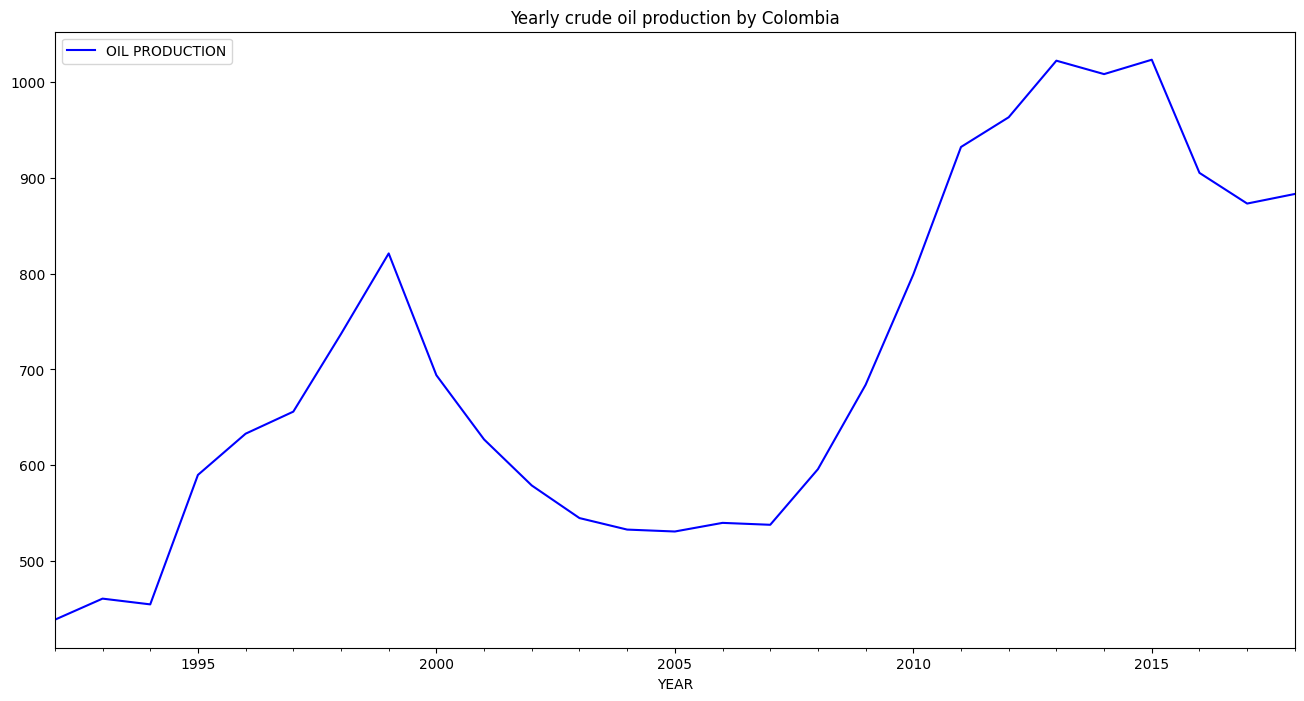

In [5]:
ax = colombia.plot(color = 'blue', figsize = (16, 8))

ax.set_title('Yearly crude oil production by Colombia')

plt.show()

- The plot above indicates that Colombia's oil production was on an upward trend from 1993 to 1999. However, from the early 2000s to the mid-2000s, it declined. Following that, it increased almost consistently until 2013 before ultimately decreasing.

- The reason for the increasing oil production could be attributed to the growing population and the subsequent rise in demand for transportation and other necessities.

Next, we will decompose the time series into its various components: trend, seasonality, and white noise. As this data is at a yearly frequency, no seasonal patterns should appear after the decomposition.

The seasonal_decompose function utilizes moving averages to decompose a time series into three components: trend, seasonal, and white noise. The decomposition process begins by estimating the trend component. The trend is then subtracted from the series, and the average of the resulting de-trended series is computed for each period, resulting in the seasonal component. Finally, the white noise or residual component is obtained by subtracting the trend and seasonal components from the original time series

In [6]:
# Using seasonal_decompose function to decompose the time series into its individual components
decomposition = sm.tsa.seasonal_decompose(colombia)

In [7]:
# Creating an empty dataframe to store the individual components
decomposed_data = pd.DataFrame()

# Extracting the trend component of time series
decomposed_data['trend'] = decomposition.trend

# Extracting the seasonal component of time series
decomposed_data['seasonal'] = decomposition.seasonal

# Extracting the white noise or residual component of time series
decomposed_data['random_noise'] = decomposition.resid

Plotting the above three components in a single plot

<Axes: xlabel='YEAR'>

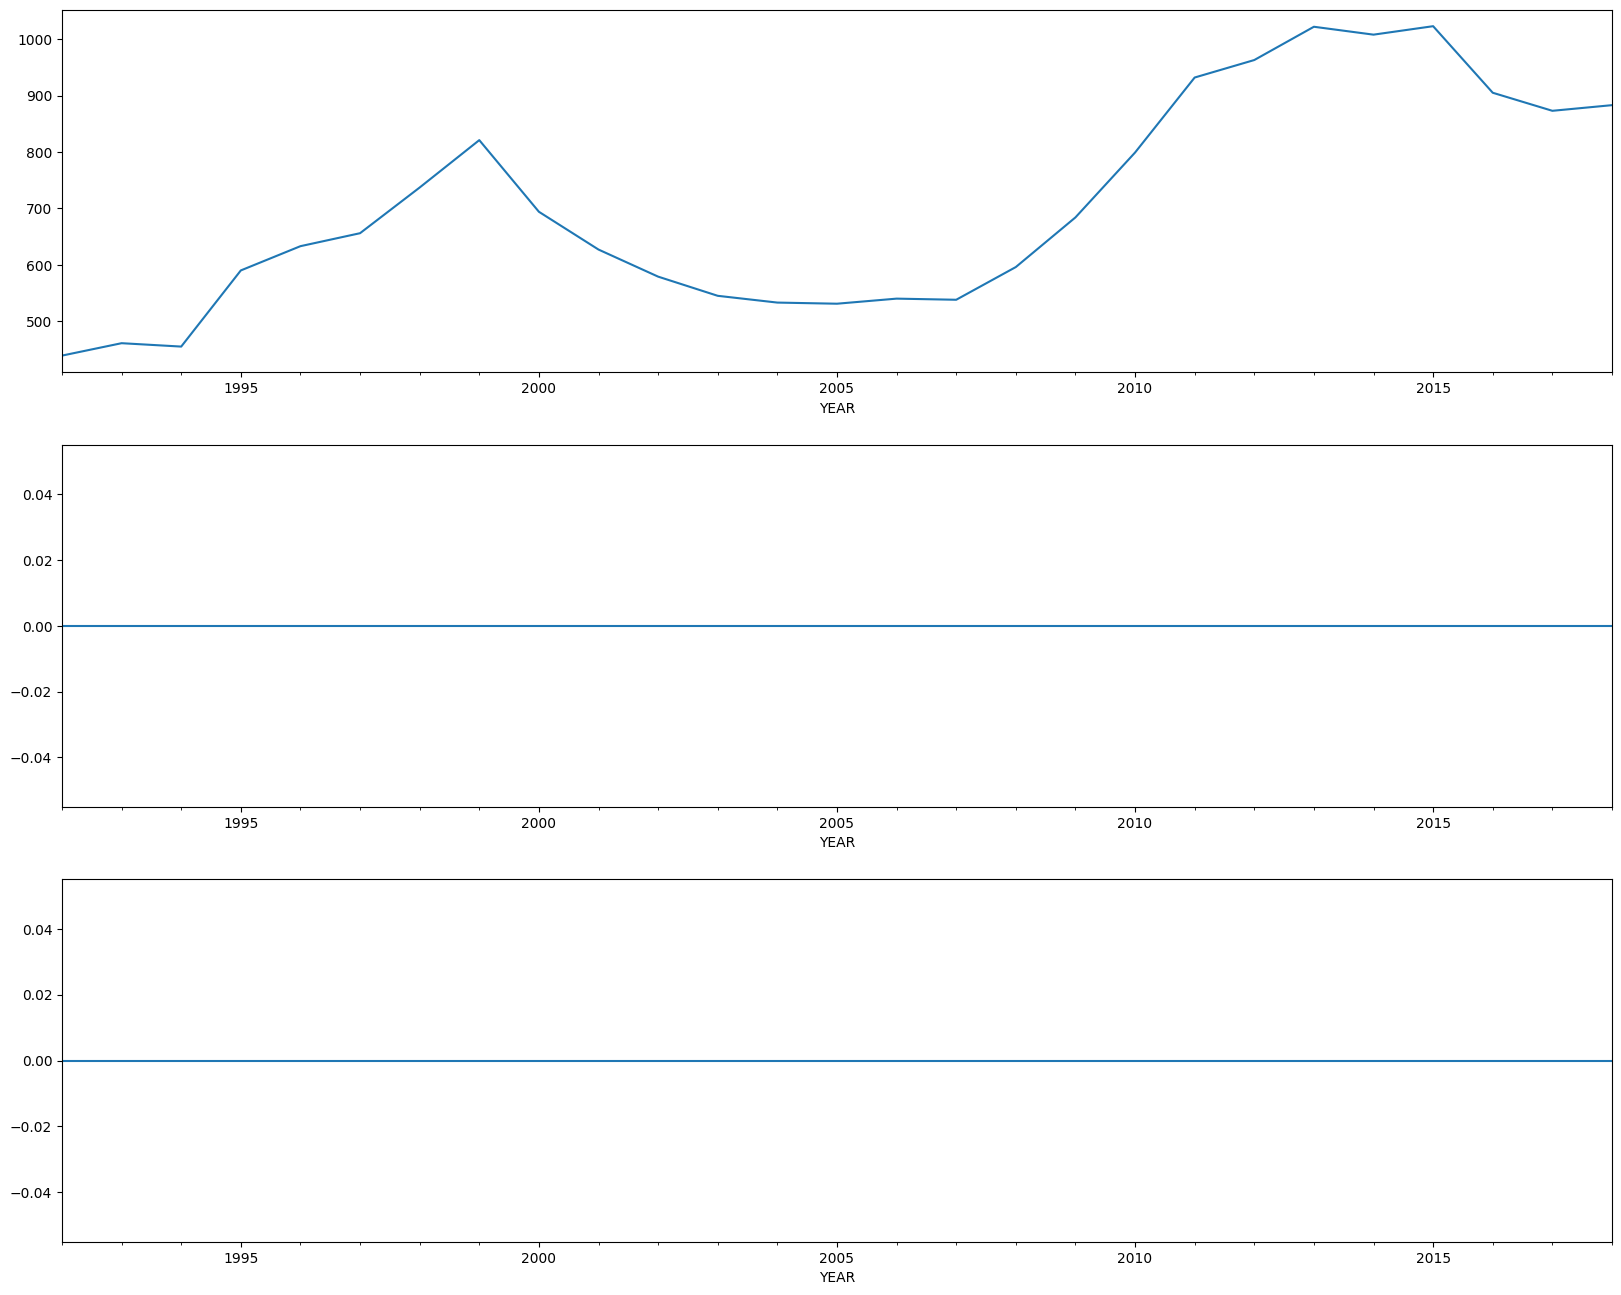

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (20, 16))

decomposed_data['trend'].plot(ax = ax1)

decomposed_data['seasonal'].plot(ax = ax2)

decomposed_data['random_noise'].plot(ax = ax3)

Based on the plot shown above, it can be observed that the seasonal and residual components of the time series have a value of zero, which is expected given that the time series has a yearly frequency.

## **Splitting the dataset**

When working with time series data, the process of splitting the dataset into training and testing sets differs from that of other types of datasets. Randomly splitting the data into train and test sets is not appropriate for time series data since we are trying to predict future outcomes based on past data. If we randomly split the dataset, we may miss important time lags that are essential for accurately predicting future outcomes through auto-regression.

**Let's split the time series dataset**

In [9]:
# Using the first 20 years data as the training data
train_data = colombia.loc['1992-01-01' : '2012-01-01']

# Using the last 7 years data as the test data
test_data = colombia.loc['2012-01-01':]

**Now, let's visualize the train and the test data in the same plot**

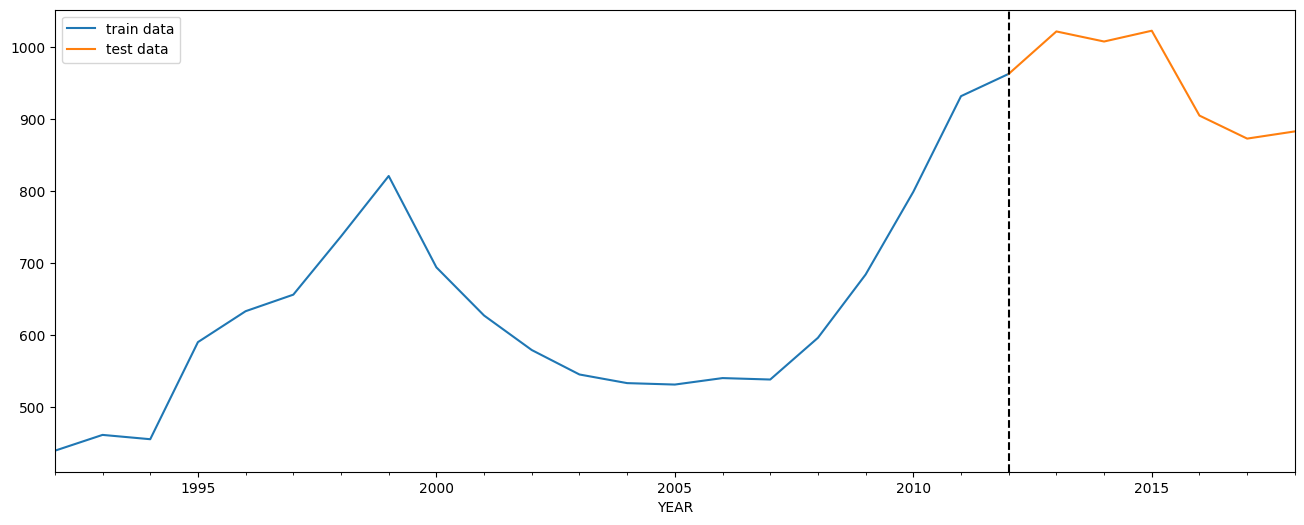

In [10]:
# Creating a subplot space
fig, ax = plt.subplots(figsize = (16, 6))

# Plotting train data
train_data.plot(ax = ax)

# Plotting test data
test_data.plot(ax = ax)

# Adding the legends in sequential order
plt.legend(['train data', 'test data'])

# Showing the time which divides the original data into train and test
plt.axvline(x = '2012-01-01', color = 'black', linestyle = '--')

# Showing the plot
plt.show()

## **Checking for stationarity**

To prepare time series data for modeling, it is important to ensure that it is stationary. If the time series is non-stationary, we can make it stationary by taking differences between data points. In ARIMA models, the number of times we take these differences is an important parameter that we will discuss shortly.

Non-stationarity in time series may appear for the following reasons: 
- Presence of a trend in the data
- Presence of heteroskedasticity
- Presence of autocorrelation

We can identify non-stationarity in the time series by performing a statistical test called the **Augmented Dicky-Fuller Test**.

- **Null Hypothesis:** The time series is non stationary
- **Alternate Hypothesis:** The time series is stationary

In [11]:
# Importing ADF test from statsmodels package
from statsmodels.tsa.stattools import adfuller

# Implementing ADF test on the original time series data
result = adfuller(train_data['OIL PRODUCTION'])

# Printing the results
print(result[0])

print(result[1]) # To get the p-value

print(result[4])

-0.7095563534204634
0.8442586741841114
{'1%': -4.068853732362312, '5%': -3.1271488757396453, '10%': -2.7017297633136095}


Here, the p-value is around 0.84, which is higher than 0.05. Hence, we fail to reject the null hypothesis, and we can say the time series is non-stationary. We can also see this visually by comparing the above ADF statistic and visually inspecting the time series.

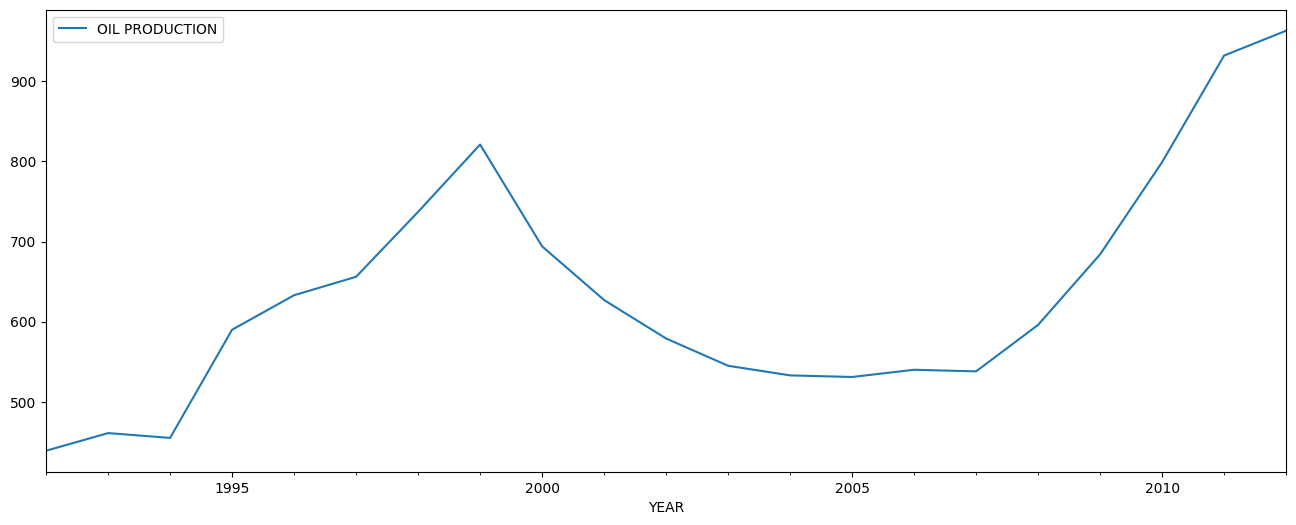

ADF Statistic: -0.7095563534204634
p-value: 0.8442586741841114


In [12]:
# Implementing ADF test on the original time series data
result = adfuller(train_data['OIL PRODUCTION'])

fig, ax = plt.subplots(figsize = (16, 6))

train_data.plot(ax = ax)

plt.show()

# Printing the results

print('ADF Statistic:', result[0])

print('p-value:', result[1])

Let now take the 1st order difference of the data and check if it becomes stationary or not.

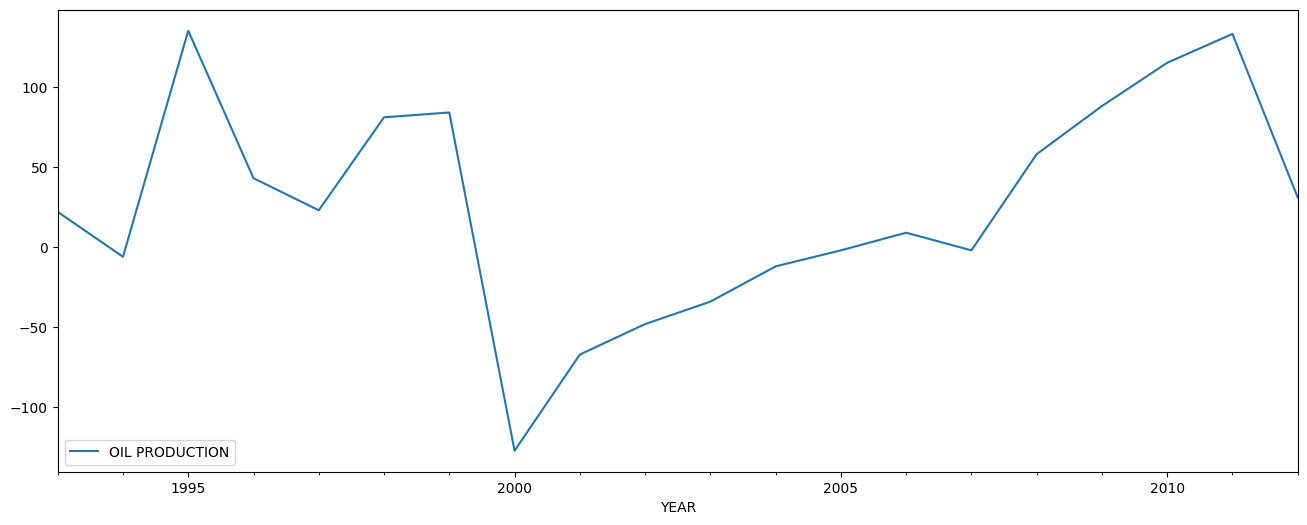

ADF Statistic: -2.561687901507499
p-value: 0.10117691209156754


In [13]:
# Taking the 1st order differencing of the timeseries
train_data_stationary = train_data.diff().dropna()

# Implementing ADF test on the first order differenced time series data
result = adfuller(train_data_stationary['OIL PRODUCTION'])

fig, ax = plt.subplots(figsize = (16, 6))

train_data_stationary.plot(ax = ax)

plt.show()

# Printing the results

print('ADF Statistic:', result[0])

print('p-value:', result[1])

Here, the p-value is around 0.1, which is again higher than 0.05. Hence, we fail to reject the null hypothesis, and we can say the time series is non-stationary. Let's take the 2nd order differencing now and perform the same test.

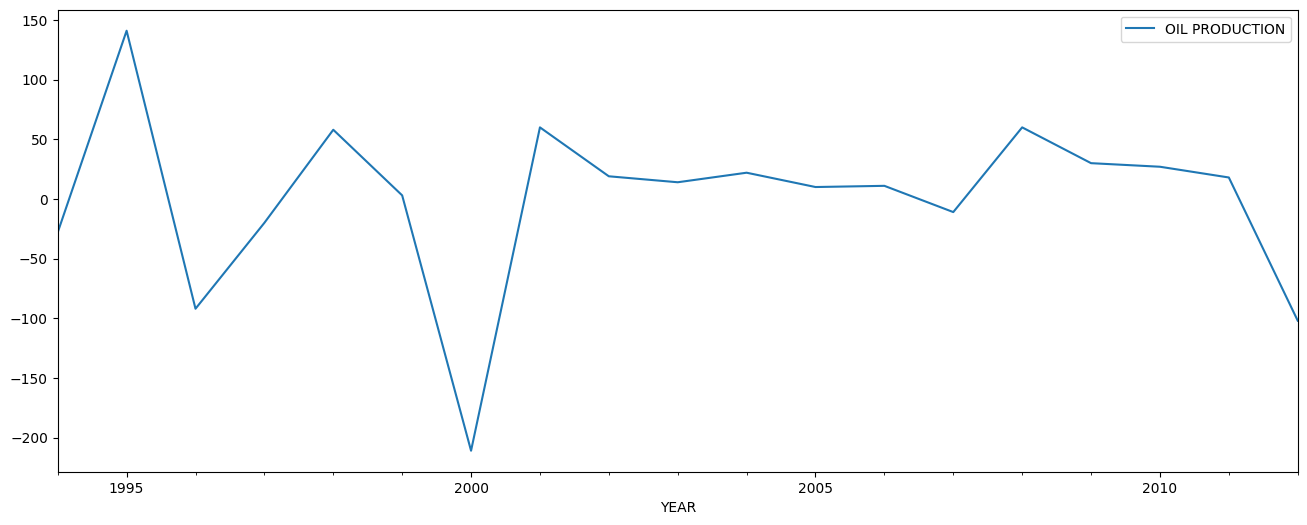

ADF Statistic: 0.5965269310473149
p-value: 0.9875297104184119


In [14]:
# Taking the 2nd order differencing of the time series
train_data_stationary = train_data.diff().diff().dropna()

# Implementing ADF test on the second order differenced time series data
result = adfuller(train_data_stationary['OIL PRODUCTION'])

fig, ax = plt.subplots(figsize = (16, 6))

train_data_stationary.plot(ax = ax)

plt.show()

# Printing the results

print('ADF Statistic:', result[0])

print('p-value:', result[1])

Here, the p-value is around 0.50, which is again higher than 0.05. Hence, we fail to reject the null hypothesis, and we can say the time series is non-stationary. Let's take the 3rd order differencing now and perform the same test.

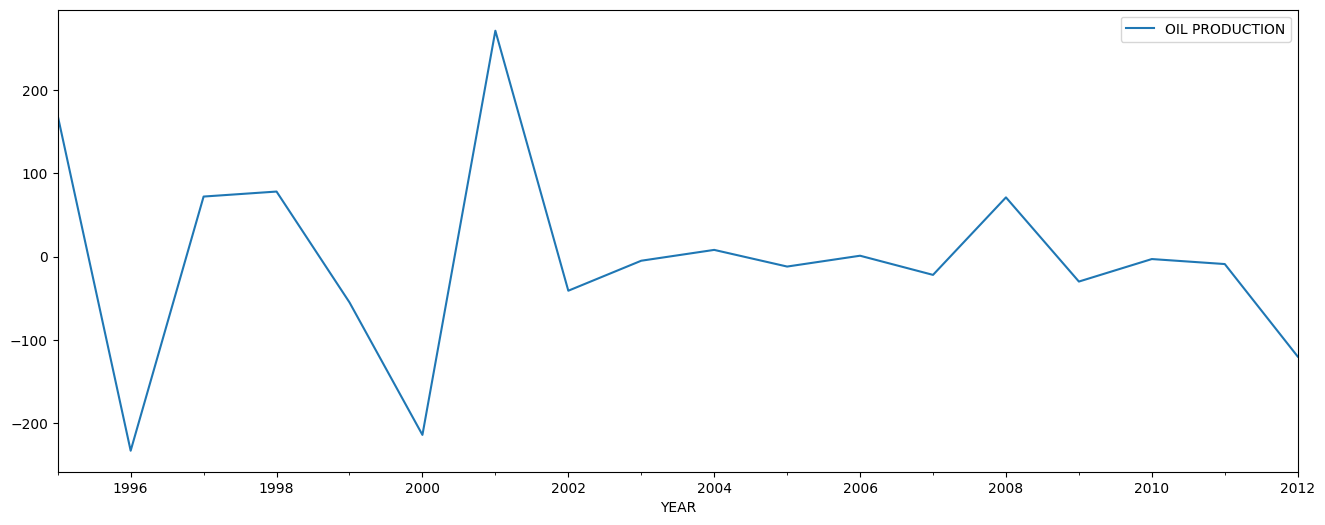

ADF Statistic: 28.49714480784894
p-value: 1.0


In [15]:
# Taking the 3rd order differencing of the time series
train_data_stationary = train_data.diff().diff().diff().dropna()

# Implementing ADF test on the third order differenced time series data
result = adfuller(train_data_stationary['OIL PRODUCTION'])

fig, ax = plt.subplots(figsize = (16, 6))

train_data_stationary.plot(ax = ax)

plt.show()

# Printing the results

print('ADF Statistic:', result[0])

print('p-value:', result[1])

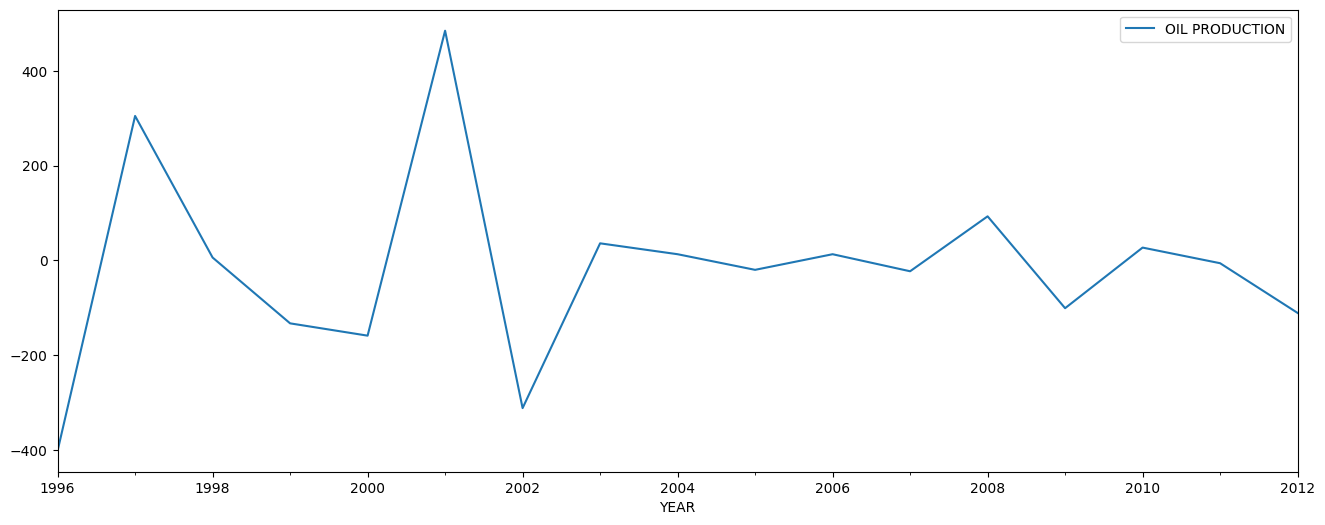

ADF Statistic: -6.130010690175781
p-value: 8.446392020272424e-08


In [16]:
# Taking the 4th order differencing of the time series
train_data_stationary = train_data.diff().diff().diff().diff().dropna()

# Implementing ADF test on the fourth order differenced time series data
result = adfuller(train_data_stationary['OIL PRODUCTION'])

fig, ax = plt.subplots(figsize = (16, 6))

train_data_stationary.plot(ax = ax)

plt.show()

# Printing the results

print('ADF Statistic:', result[0])

print('p-value:', result[1])

Now, the p-value is less than 0.05, and we can say that after taking 4rd order differencing, the time series became stationary. This parameter is also known as the **Integration** parameter (denoted by `d`) in ARIMA modeling, which we will see shortly. Here, d = 4.

## **ACF and PACF Plots**

ACF and PACF plots are used to identify the model's order in ARIMA models. These plots help to find the parameters `p` and `q`. Also, we always plot the ACF and PACF plots after making the time series stationary.

**Let's generate the ACF and PACF plots.**

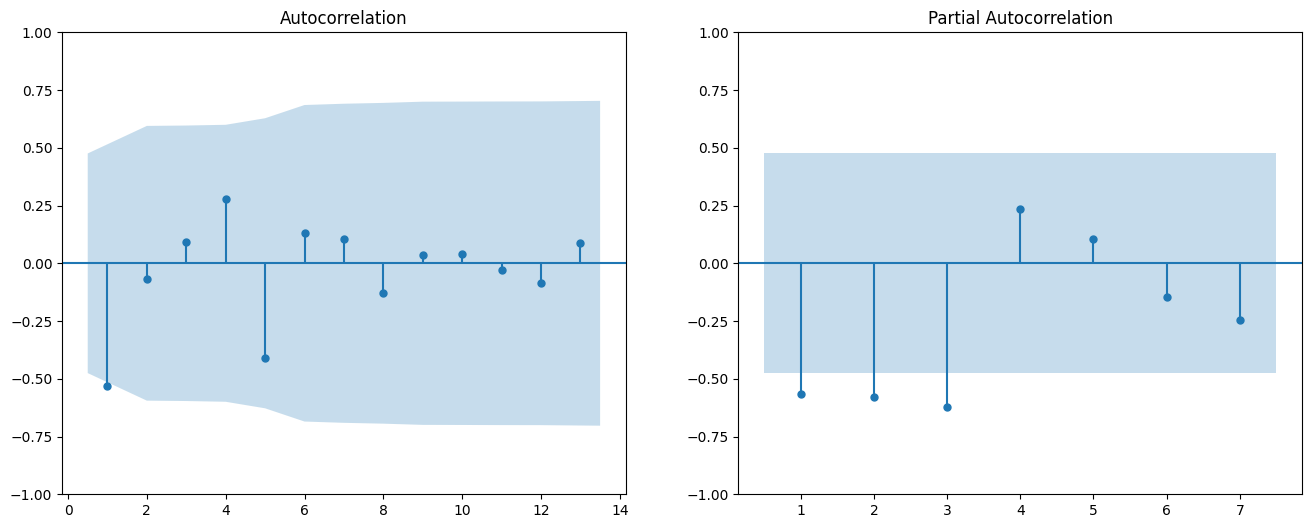

In [17]:
# Creating two subplots to show ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6))

# Creating and plotting the ACF charts starting from lag = 1
tsaplots.plot_acf(train_data_stationary, zero = False, ax = ax1)

# Creating and plotting the ACF charts starting from lag = 1 till lag = 7
tsaplots.plot_pacf(train_data_stationary, zero = False, ax = ax2, lags = 7)

plt.show()

From the above plots, it does not look like this stationary time series follows a pure AR or MA model. To find out the optimal values of p, d, and q, we need to do a hyper-parameter search to find their optimal values.



Below we will try several different modeling techniques on this time series:
- AR (p)
- MA (q)
- ARMA (p, q)
- ARIMA (p, d, q)

and then we will check which one performs better.

## **Evaluation Metrics**

Before we build the model, we need to select which evaluation metric we want to optimize to build the model. There are several evaluation metrics to choose from for time series. Here, we will check the evaluation metrics - `AIC` and `RMSE`.

`AIC` and `RMSE` have different objectives or significance while selecting the best time series model. `RMSE` measures how far away the forecasts are in comparison to the actual values in the time series. It completely disregards the complexity of the model. Minimizing the `RMSE` provides very accurate results, but could lead to an overly complex model that captures too much noise in the data, which is also known as overfitting in the model.

But `AIC` has a different objective. `AIC` takes the error term and adds a penalty related to the number of predictors used in the model such that more complex models are penalized and allow to tradeoff between a `complex but accurate model`, against a `simpler but reasonably accurate model`.

So we need to make a decision based on the purpose of the model and the problem statement at hand while choosing the best evaluation metric.

## **AR Modeling**

Below we will build several AR models at different lags and try to understand whether the AR model will be a good fit or not. Below is a generalized equation for the AR model.

$$
y_{t}=a_{1} y_{t-1} + a_{2} y_{t-2} + \ldots + a_{p} y_{t-p} + \epsilon_{t}
$$

Here, we are building four AR models at lags 1, 2, 3, and 4.

In [18]:
# We are using the ARIMA function to build the AR model, so we need to pass the stationary time series that we got after double 
# differencing the original time series. Also, we will keep the q parameter as 0, so that the model acts as an AR model

# Creating an AR model with parameter p = 1
ar_1_model = ARIMA(train_data_stationary, order = (1, 0, 0))

# Creating an AR model with parameter p = 2
ar_2_model = ARIMA(train_data_stationary, order = (2, 0, 0))

# Creating an AR model with parameter p = 3
ar_3_model = ARIMA(train_data_stationary, order = (3, 0, 0))

# Creating an AR model with parameter p = 4
ar_4_model = ARIMA(train_data_stationary, order = (4, 0, 0))

In [19]:
# Fitting all the models that we implemented in the above cell

ar_1_results = ar_1_model.fit()

ar_2_results = ar_2_model.fit()

ar_3_results = ar_3_model.fit()

ar_4_results = ar_4_model.fit()

As we have passed the stationary time series while fitting the above AR models. The forecasts that we get will also be on the same scale, i.e., after doing double differencing of original time series. Therefore, to get the forecasts in the original scale, we need to **inverse transform** the time series data. The below function is helping us to do that inverse transformation.

In [20]:
def plot_predicted_output(results, ax):
    
    # We are taking double cumulative sum of forecasted values (which is inverse of double differencing)
    # And we are also adding the last element of the training data to the forecasted values to get back to the original scale
    predictions = np.cumsum(np.cumsum(results.predict(start = 19, end = 25))) + train_data.iloc[-1][0]
    
    # Setting indices of the test data into prediction values
    predictions.index = test_data.index
    
    # Computing the AIC and RMSE metrics for the model and printing it into title of the plot
    train_data.plot(ax = ax, label = 'train', 
                    title = 'AIC: {}'.format(np.round(results.aic, 2)) + 
                           ' , ' +
                           'RMSE: {}'.format(np.round(np.sqrt(mean_squared_error(test_data, predictions)), 2)))
    
    # Plotting the test data
    test_data.plot(ax = ax) 
    
    # Plotting the forecasted data
    predictions.plot(ax = ax)
    
    # Adding the legends sequentially
    ax.legend(['train data', 'test data', 'forecasted values'])

**Now, let's plot the forecasted values from all the four models, and then compare the model outputs.**

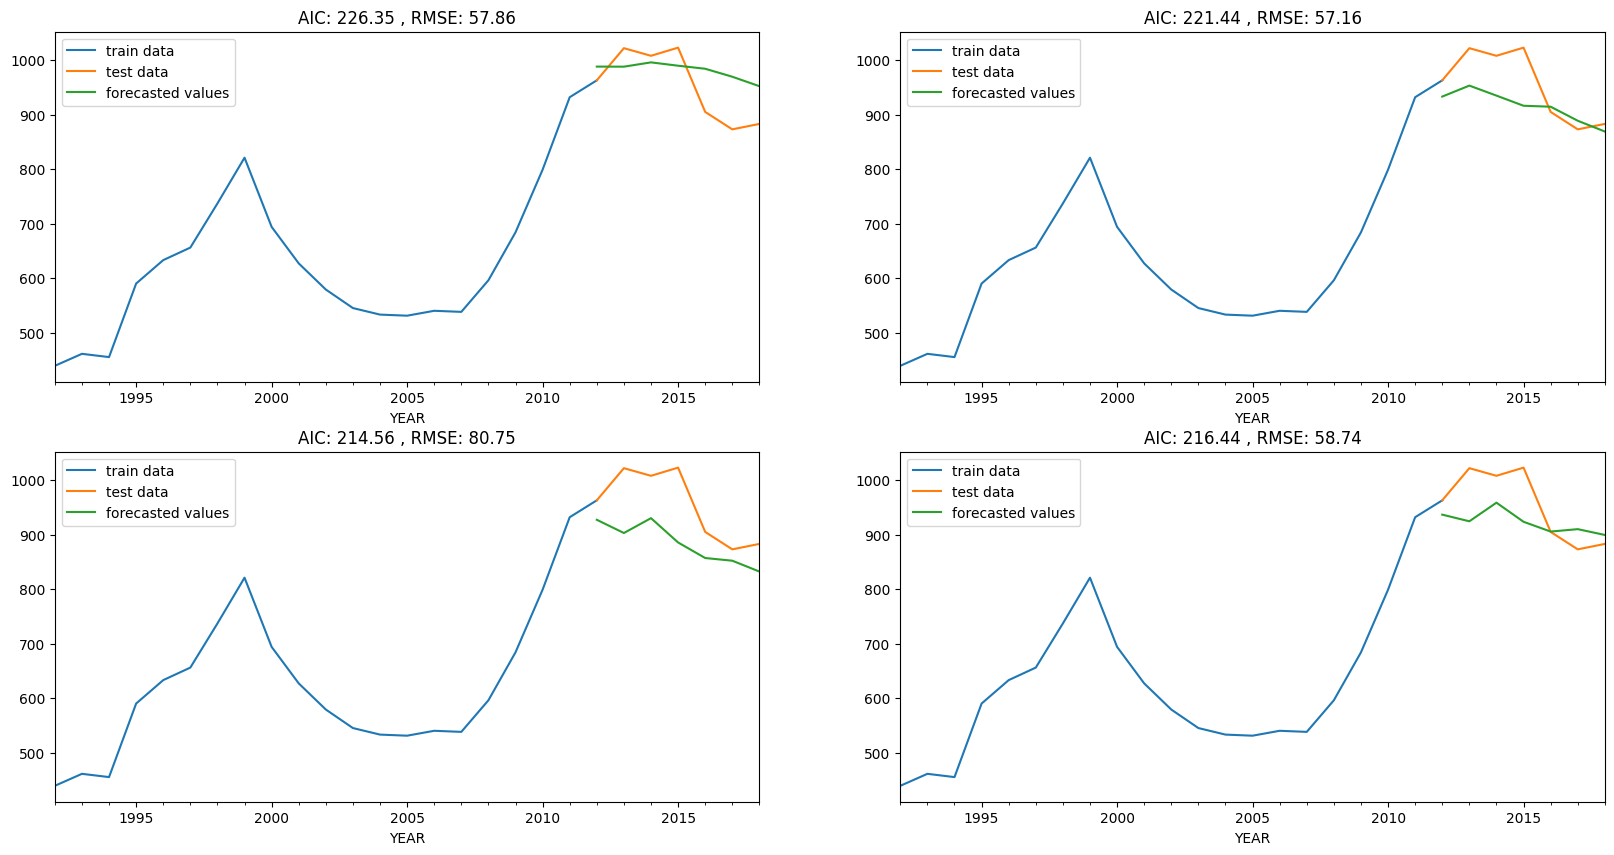

In [21]:
# Plotting the forecasted values along with train and test for all the models

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))

plot_predicted_output(ar_1_results, ax1)

plot_predicted_output(ar_2_results, ax2)

plot_predicted_output(ar_3_results, ax3)

plot_predicted_output(ar_4_results, ax4)

plt.show()

As we can see from the above results, out of these four models we have developed, the AIC values for all these models are very much comparable or approximately the same. But if we check the RMSE values, it is the least for AR(2) or ARIMA(2, 0, 0) model, and it is significantly less than the other three models. Based on this analysis, AR(2) or ARIMA(2, 0, 0) looks the best model if we only want to use the AR component while modeling. 

**Let's now check the model summary of this AR(4) or ARIMA(2, 0, 0) model.**

In [22]:
ar_2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         OIL PRODUCTION   No. Observations:                   17
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -106.720
Date:                Mon, 24 Apr 2023   AIC                            221.440
Time:                        23:17:44   BIC                            224.773
Sample:                    01-01-1996   HQIC                           221.772
                         - 01-01-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8221     18.436     -0.153      0.878     -38.956      33.312
ar.L1         -0.9947      0.240     -4.139      0.000      -1.466      -0.524
ar.L2         -0.6236      0.268     -2.330      0.020      -1.148      -0.099
sigma2      1.524e+04   6100.132      2.499      0.012    3286.485    2.72e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.82   Jarque-Bera (JB):                 0.84
Prob(Q):                              0.18   Prob(JB):                         0.66
Heteroskedasticity (H):               0.08   Skew:                            -0.48
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

So the equation for this model would be:

$$
y_{t}= -2.8221 - 0.9947 y_{t-1} - 0.6236 y_{t-2}  + \epsilon_{t}
$$

## **MA Modeling**

Now, we will build several MA models at different lags and try to understand whether the MA model will be a good fit or not in comparison to the AR models that we have built so far. Below is a generalized equation for the MA model.

$$
y_{t}=m_{1} \epsilon_{t-1} + m_{2} \epsilon_{t-2} + \ldots+m_{q} \epsilon_{t-q} + \epsilon_{t}
$$

In [23]:
# We are using the ARIMA function to build the MA model, so we need to pass the stationary time series that we got after double 
# differencing the original time series. Also, we will keep the p parameter as 0 so that the model acts as an MA model

# Creating MA model with parameter q = 1
ma_1_model = ARIMA(train_data_stationary, order = (0, 0, 1))

# Creating MA model with parameter q = 2
ma_2_model = ARIMA(train_data_stationary, order = (0, 0, 2))

# Creating MA model with parameter q = 3
ma_3_model = ARIMA(train_data_stationary, order = (0, 0, 3))

# Creating MA model with parameter q = 4
ma_4_model = ARIMA(train_data_stationary, order = (0, 0, 4))

In [24]:
# Fitting all the models that we implemented in the above cell

ma_1_results = ma_1_model.fit()

ma_2_results = ma_2_model.fit()

ma_3_results = ma_3_model.fit()

ma_4_results = ma_4_model.fit()

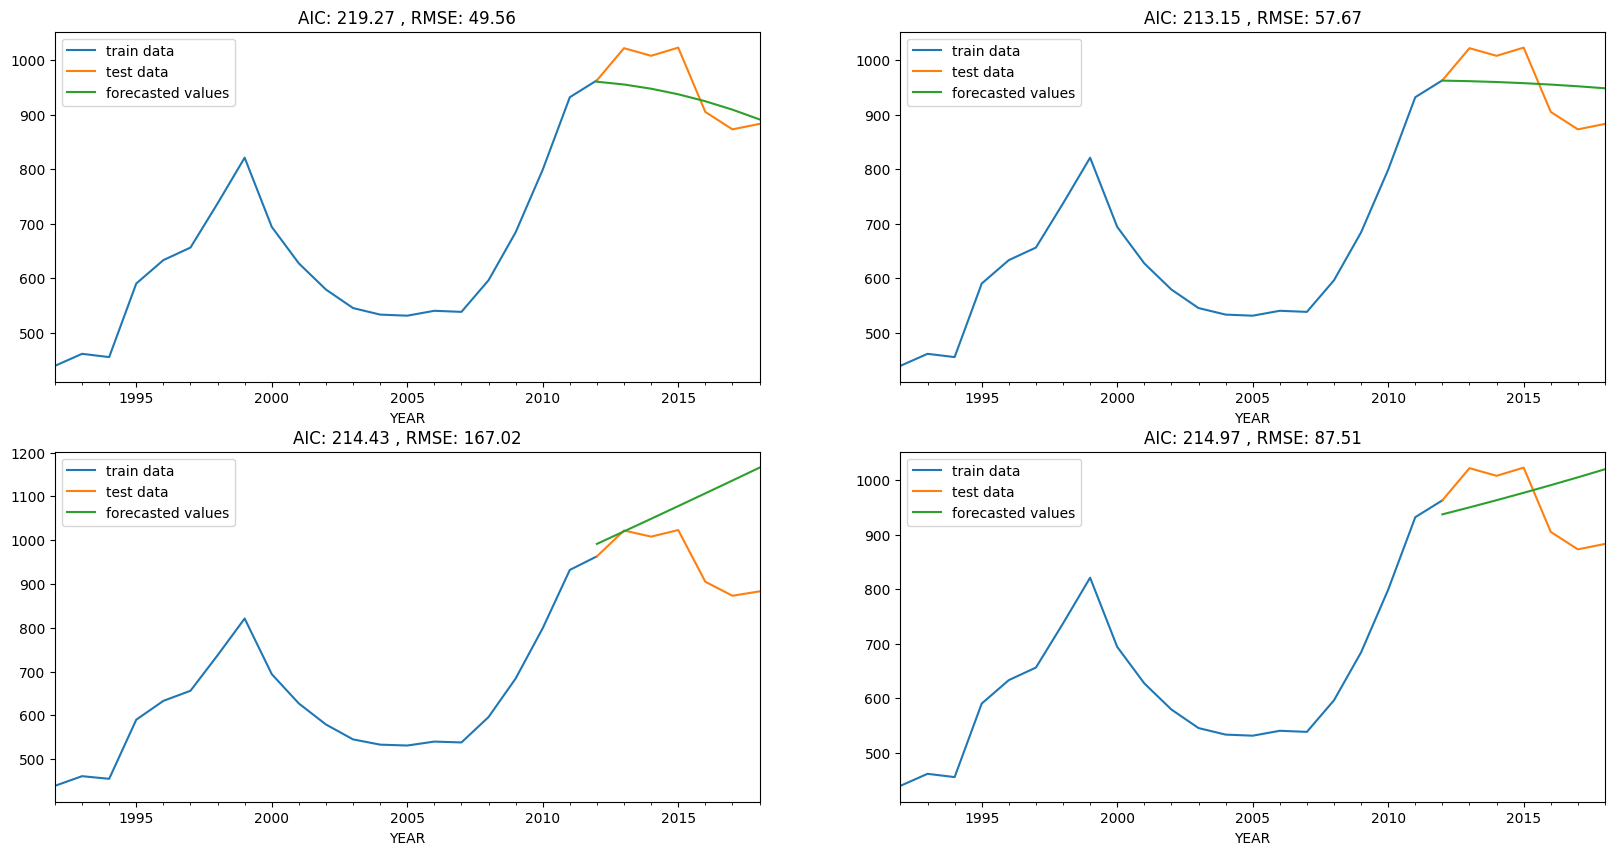

In [25]:
# Plotting the forecasted values along with train and test for all the models

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))

plot_predicted_output(ma_1_results, ax1)

plot_predicted_output(ma_2_results, ax2)

plot_predicted_output(ma_3_results, ax3)

plot_predicted_output(ma_4_results, ax4)

plt.show()

As we can see from the above plots, again all the models that we have developed so far are comparable to AIC, but RMSE is significantly lower for MA(1) model in comparison to all the other models. So, the best model that we have got using MA modeling, is MA(1) or ARIMA(0, 0, 1). This also aligns with our observation that ACF plot seems to cut off at lag 1.  

**Let's analyze the model summary for MA(1) or ARIMA(0, 0, 1) below.**

In [26]:
ma_1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         OIL PRODUCTION   No. Observations:                   17
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -106.633
Date:                Mon, 24 Apr 2023   AIC                            219.266
Time:                        23:17:49   BIC                            221.766
Sample:                    01-01-1996   HQIC                           219.514
                         - 01-01-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5629      9.309     -0.275      0.783     -20.809      15.683
ma.L1         -0.9983     40.596     -0.025      0.980     -80.565      78.568
sigma2      1.389e+04   5.63e+05      0.025      0.980   -1.09e+06    1.12e+06
===================================================================================
Ljung-Box (L1) (Q):                   2.33   Jarque-Bera (JB):                 1.70
Prob(Q):                              0.13   Prob(JB):                         0.43
Heteroskedasticity (H):               0.08   Skew:                            -0.02
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## **ARMA Modeling**

From the above two models (i.e., AR and MA) that we have built so far, it looks like we have got a better model at AR(2) and MA(1) on the differenced (i.e., stationary) time series data. Now, we will build several ARMA models with different combinations of p and q parameters on the differenced time series data. And we will evaluate those models based on `AIC` and `RMSE`. Let's build those models.

Below is a generalized equation for the ARMA model.

$$
y_{t}=a_{1} y_{t-1}+m_{1} \epsilon_{t-1} + \ldots + \epsilon_{t}
$$

In [27]:
# We are using the ARIMA function here, so we need to pass stationary time series that we got after double differencing the 
# original time series

# Creating an ARMA model with parameters p = 2 and q = 1
ar_2_ma_1_model = ARIMA(train_data_stationary, order = (2, 0, 1))

# Creating an ARMA model with parameters p = 2 and q = 2
ar_2_ma_2_model = ARIMA(train_data_stationary, order=(2, 0, 2))

# Creating an ARMA model with parameters p = 3 and q = 2
ar_3_ma_2_model = ARIMA(train_data_stationary, order = (3, 0, 2))

# Creating an ARMA model with parameters p = 2 and q = 3
ar_2_ma_3_model = ARIMA(train_data_stationary, order = (2, 0, 3))

In [28]:
# Fitting all the models that we implemented in the above cell

ar_2_ma_1_results = ar_2_ma_1_model.fit()

ar_2_ma_2_results = ar_2_ma_2_model.fit()

ar_3_ma_2_results = ar_3_ma_2_model.fit()

ar_2_ma_3_results = ar_2_ma_3_model.fit()

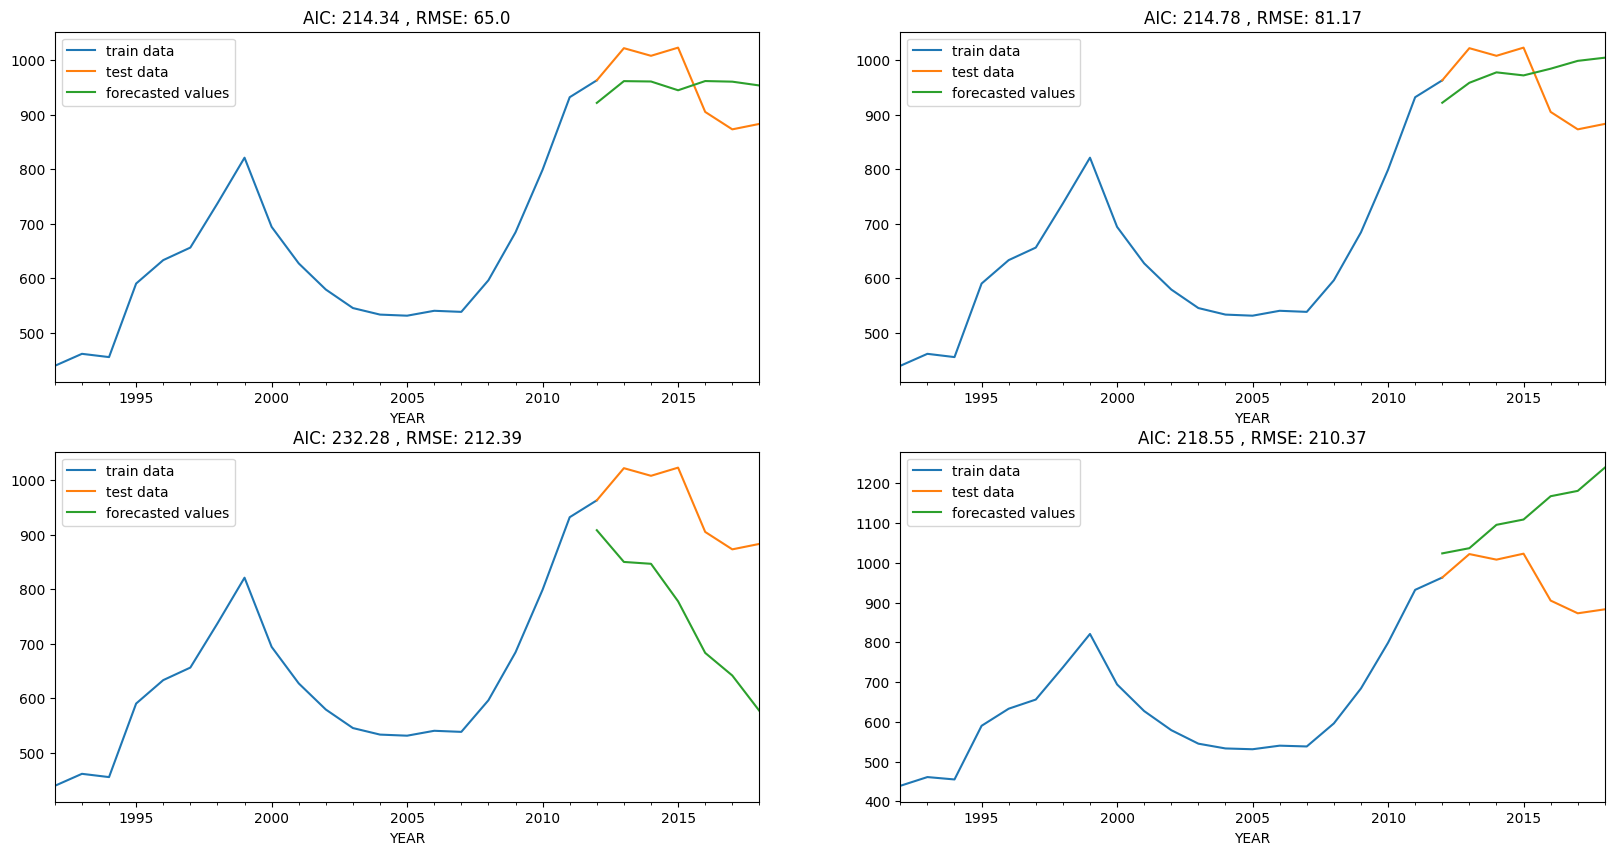

In [29]:
# Plotting the forecasted values along with train and test for all the models

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))

plot_predicted_output(ar_2_ma_1_results, ax1)

plot_predicted_output(ar_2_ma_2_results, ax2)

plot_predicted_output(ar_3_ma_2_results, ax3)

plot_predicted_output(ar_2_ma_3_results, ax4)

plt.show()

As we can see from the above plots, again all the models that we have developed so far have comparable AIC, but for one specific model, i.e., ARIMA(2, 0, 1), the `RMSE` is significantly lower than the models that we have developed above. Also, it is evident from the above plots that the forecasted values from the model ARIMA(2, 0, 1) are closer to the test data in comparison to all the other models.

**Let's analyze the summary for the model ARIMA(2, 0, 1).**

In [30]:
ar_2_ma_1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         OIL PRODUCTION   No. Observations:                   17
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -102.172
Date:                Mon, 24 Apr 2023   AIC                            214.344
Time:                        23:17:56   BIC                            218.510
Sample:                    01-01-1996   HQIC                           214.758
                         - 01-01-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5787      3.809     -0.152      0.879      -8.044       6.886
ar.L1         -0.7652      0.272     -2.811      0.005      -1.299      -0.232
ar.L2         -0.5552      0.216     -2.568      0.010      -0.979      -0.131
ma.L1         -0.9983     72.092     -0.014      0.989    -142.296     140.299
sigma2      7050.3537   5.06e+05      0.014      0.989   -9.84e+05    9.98e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):                 2.02
Prob(Q):                              0.51   Prob(JB):                         0.36
Heteroskedasticity (H):               0.23   Skew:                            -0.84
Prob(H) (two-sided):                  0.10   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## **ARIMA Modeling**

So far, we have built several AR, MA, and ARMA models, and while building those models, it is necessary to make the time series stationary. But while building ARIMA models, we can directly pass the non-stationary time series, as the new parameter which is required in ARIMA modeling, i.e., `d` parameter (along with parameters `p` and `q`) will automatically difference the data to make the time series stationary.

In [31]:
train_data = train_data.astype('float32')

We are using the ARIMA function here, so we do not need to pass stationary time series, we can simply pass the original time without differencing, and pass the parameter d = 4, as we already know that after triple differencing the original time series becomes a stationary time series.

In [32]:
# Creating an ARIMA model with parameters p = 2, d = 4 and q = 1
ar_2_d_4_ma_1_model = ARIMA(train_data, order = (2, 4, 1))

# Creating an ARIMA model with parameters p = 1, d = 4 and q = 2
ar_1_d_4_ma_2_model = ARIMA(train_data, order = (1, 4, 2))

# Creating an ARIMA model with parameters p = 2, d = 4 and q = 2
ar_2_d_4_ma_2_model = ARIMA(train_data, order = (2, 4, 2))

# Creating an ARIMA model with parameters p = 3, d = 4 and q = 2
ar_3_d_4_ma_2_model = ARIMA(train_data, order = (3, 4, 2))

In [33]:
# Fitting all the models that we implemented in the above cell

ar_2_d_4_ma_1_results = ar_2_d_4_ma_1_model.fit()

ar_1_d_4_ma_2_results = ar_1_d_4_ma_2_model.fit()

ar_2_d_4_ma_2_results = ar_2_d_4_ma_2_model.fit()

ar_3_d_4_ma_2_results = ar_3_d_4_ma_2_model.fit()

Before we plot the forecasted values, we need to update the plot_predicted_output() function because the ARIMA model predicts the transformed values and hence we don't need to perform operations of the cumulative sum to inverse transform the predicted values.

In [34]:
def plot_predicted_output_new(results, ax):
    
    predictions = results.predict(start = 19, end = 25)
    
    # Setting indices of the test data into prediction values
    predictions.index = test_data.index
    
    # Computing the AIC and RMSE metrics for the model and printing it into title of the plot
    train_data.plot(ax = ax, label = 'train', 
                    
                    title = 'AIC: {}'.format(np.round(results.aic, 2)) + 
                           ' , ' +
                           'RMSE: {}'.format(np.round(np.sqrt(mean_squared_error(test_data, predictions)), 2)))
    
    # Plotting the test data
    test_data.plot(ax = ax) 
    
    # Plotting the forecasted data
    predictions.plot(ax = ax)
    
    # Adding the legends sequentially
    ax.legend(['train data', 'test data', 'forecasted values'])

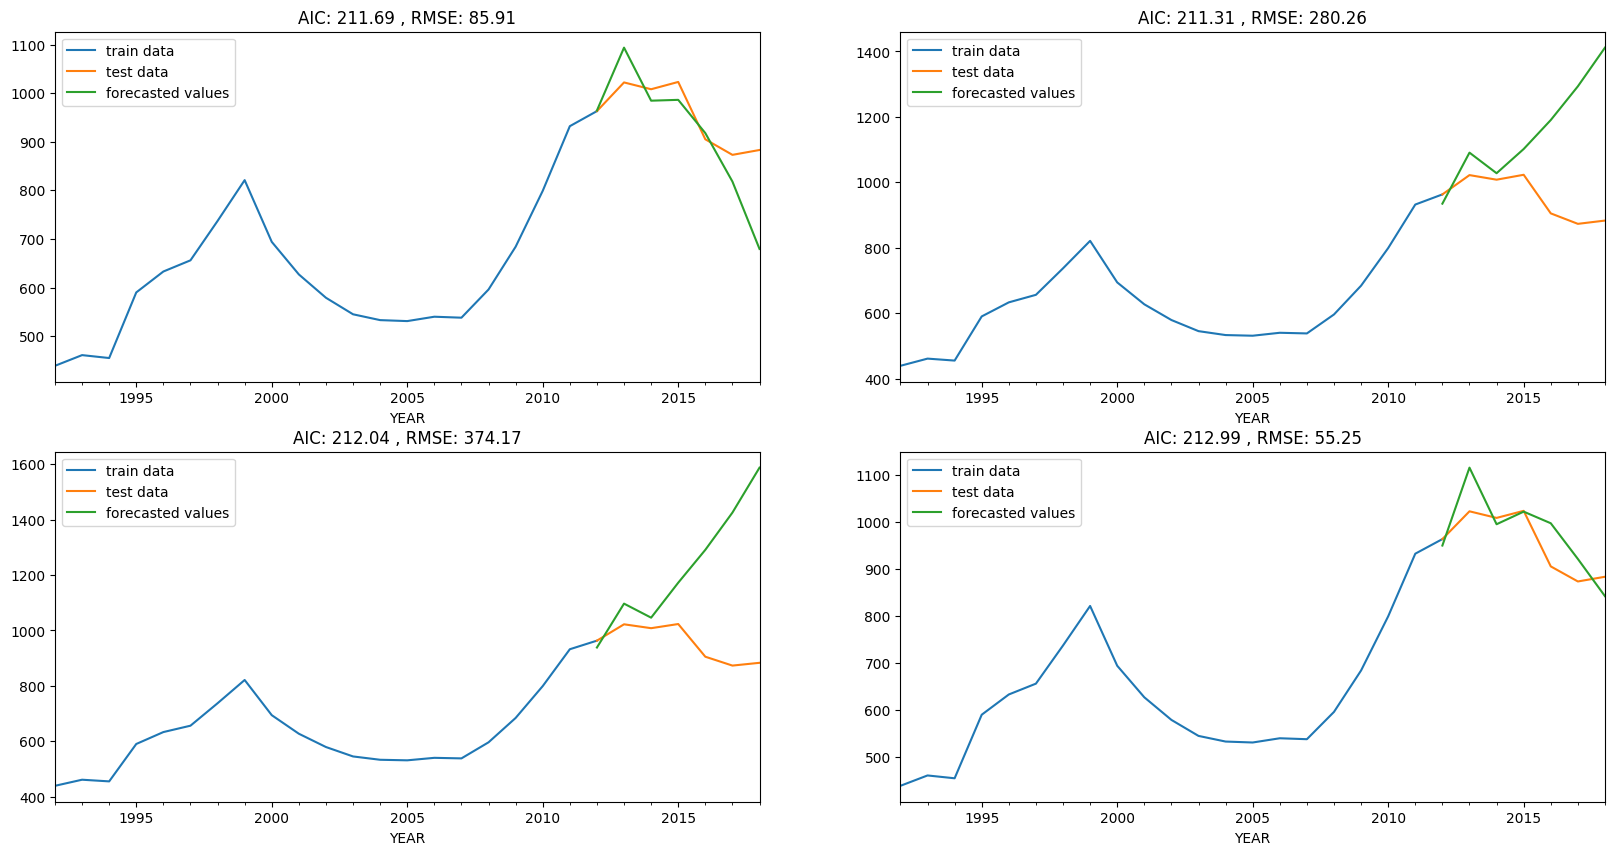

In [35]:
# Plotting the forecasted values along with train and test for all the models

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))

plot_predicted_output_new(ar_2_d_4_ma_1_results, ax1)

plot_predicted_output_new(ar_1_d_4_ma_2_results, ax2)

plot_predicted_output_new(ar_2_d_4_ma_2_results, ax3)

plot_predicted_output_new(ar_3_d_4_ma_2_results, ax4)

plt.show()

From the above analysis, we can see that the ARIMA(3, 4, 2) is the best model in comparison to others, as it has comparable AIC to other models and less RMSE in comparison to all the other models.

**Let's analyze the model summary for ARIMA(3, 4, 2).**

In [36]:
ar_3_d_4_ma_2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         OIL PRODUCTION   No. Observations:                   21
Model:                 ARIMA(3, 4, 2)   Log Likelihood                -100.495
Date:                Mon, 24 Apr 2023   AIC                            212.990
Time:                        23:18:03   BIC                            217.990
Sample:                    01-01-1992   HQIC                           213.487
                         - 01-01-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3613      0.601     -2.265      0.024      -2.539      -0.183
ar.L2         -1.1427      0.468     -2.441      0.015      -2.060      -0.225
ar.L3         -0.5954      0.286     -2.081      0.037      -1.156      -0.035
ma.L1         -0.5454      1.018     -0.536      0.592      -2.540       1.449
ma.L2         -0.4543      0.805     -0.565      0.572      -2.031       1.123
sigma2      5753.1750      0.000   4.35e+07      0.000    5753.175    5753.175
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 1.42
Prob(Q):                              0.85   Prob(JB):                         0.49
Heteroskedasticity (H):               0.62   Skew:                            -0.66
Prob(H) (two-sided):                  0.57   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.51e+23. Standard errors may be unstable.
"""

**Now that we have identified the best parameters (p, d, and q) for our data. Let's train the model with the same parameters on the full data for Colombia and get the forecasts for the next 7 years, i.e., from 2019-01-01 to 2025-01-01.**

In [37]:
final_model = ARIMA(colombia, order = (3, 4, 2))

final_model_results = final_model.fit()

In [38]:
forecasted_ARIMA = final_model_results.predict(start = '2019-01-01', end = '2025-01-01')

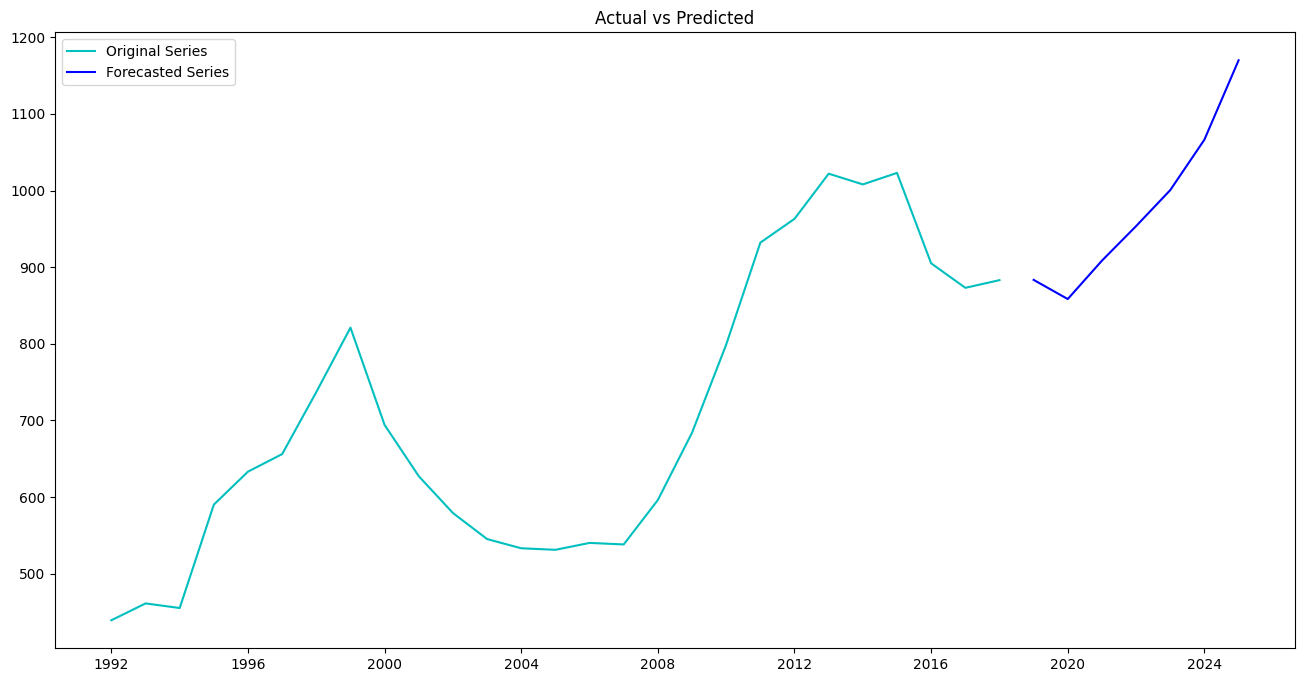

In [39]:
# Plotting the original time seris with forecast

plt.figure(figsize = (16, 8))

plt.plot(colombia, color = 'c', label = 'Original Series')

plt.plot(forecasted_ARIMA, label = 'Forecasted Series', color = 'b')

plt.title('Actual vs Predicted')

plt.legend()

plt.show()

- The above plot shows that the model is able to identify the trend in the data and forecast the values accordingly. 
- The forecast indicates that, according to the historic data, the oil production is going to constantly increase for United Sates.

## **Conclusion**

 - We have built different types of models using search for the optimal parameters for each. We have compared all the models based on the evaluation metrics `AIC` and `RMSE`.
 - The AIC for all the models is approximately the same, i.e., there is no significant difference in the AIC values for all the models. But, we can see significant difference in some of the models in terms of RMSE. So, the choice of model is more dependent on RMSE for the current data.
 - Overall, the model `ARIMA(3, 4, 2) has given the best results` and we have used the same to forecast the oil production for Colombia.

## **Additional Model - Auto ARIMA**

Alternatively, we can also model this time series `automatically`, without needing to go through all the steps that we have gone through so far. In the below piece of code, when we pass the training data, it automatically finds the best parameters for you and then model the time series as shown below.

In [42]:

import pmdarima as pm

auto_arima_model = pm.auto_arima(train_data, d = 4, seasonal = False, trace = True, 
                                 error_action = 'ignore', suppress_warnings = True)

print(auto_arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,4,2)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(0,4,0)(0,0,0)[0]             : AIC=230.000, Time=0.02 sec
 ARIMA(1,4,0)(0,0,0)[0]             : AIC=223.969, Time=0.05 sec
 ARIMA(0,4,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,4,0)(0,0,0)[0]             : AIC=218.891, Time=0.09 sec
 ARIMA(3,4,0)(0,0,0)[0]             : AIC=212.042, Time=0.08 sec
 ARIMA(4,4,0)(0,0,0)[0]             : AIC=213.905, Time=0.16 sec
 ARIMA(3,4,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(2,4,1)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(4,4,1)(0,0,0)[0]             : AIC=inf, Time=0.55 sec
 ARIMA(3,4,0)(0,0,0)[0] intercept   : AIC=213.831, Time=0.33 sec

Best model:  ARIMA(3,4,0)(0,0,0)[0]          
Total fit time: 1.902 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMA

The auto-arima model is also giving out the best model as - `ARIMA(0, 3, 1)(0, 0, 0)[0]`, which is different from what we have chosen earlier. There are two important points: 

- In the best model that we have got, the last four parameters are zeros. Those are the parameters that are responsible for capturing the `seasonality in the time series`. Since this time series has a yearly frequency, it is expected that it will not have any seasonal patterns.
- Also, auto-arima tries to minimize the `AIC`, rather than `RMSE` of the model. So, we need to compute the RMSE of these models manually, to check whether the model has acceptable RMSE or not. The best model from auto-arima might not have a good/acceptable RMSE score.

**We can also plot and analyze the model diagnostics for residuals as shown below**

If the residuals are normally distributed and are uncorrelated to each other, then we actually have a good model.

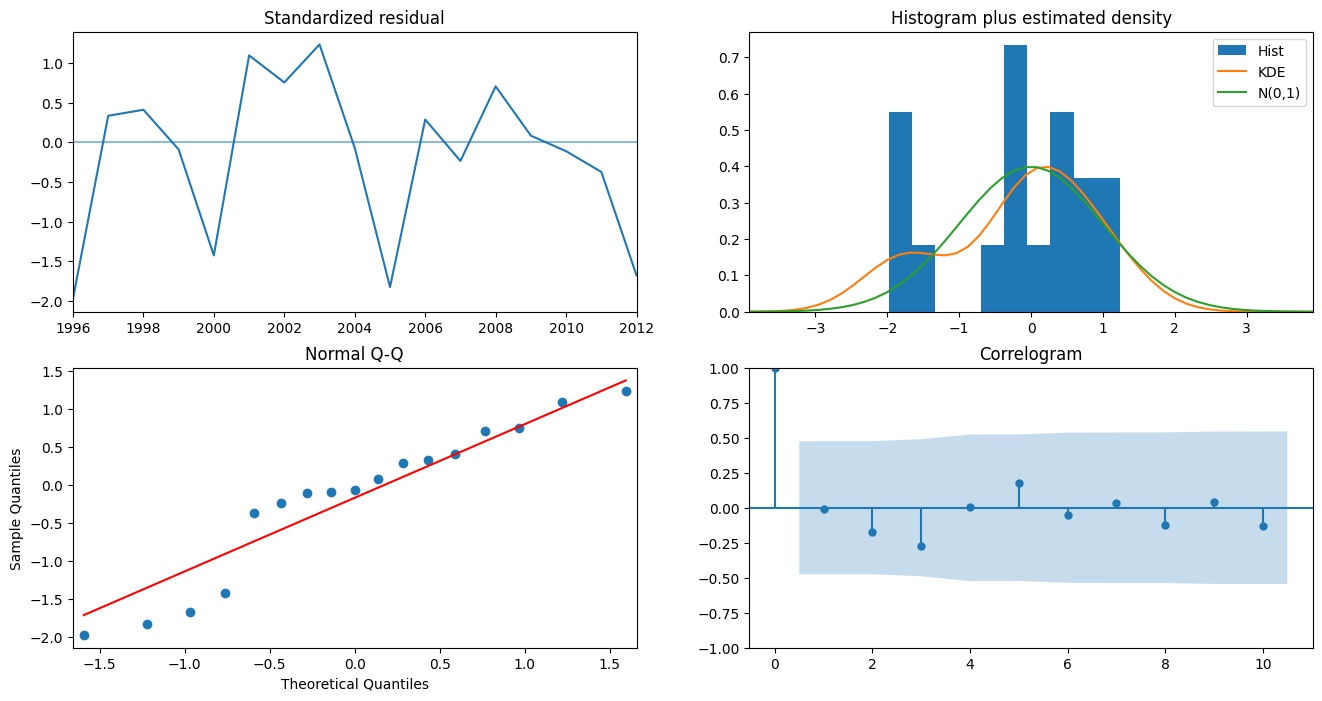

In [43]:
fig = plt.figure(figsize = (16, 8))

fig = auto_arima_model.plot_diagnostics(fig = fig)

**Observations:**

- **Top left**: The residual errors seem to fluctuate around a mean of zero and have a approximately uniform variance.

- **Top Right**: The density plot suggests that the distribution of residuals is close to a standard normal distribution.

- **Bottom left**: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution of residuals is skewed.

- **Bottom Right**: The ACF plot shows the residual errors are not autocorrelated as no lag other than 0 is significant. Any autocorrelation would imply that there is some pattern in the residual errors that is not explained by the model.